In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_customer = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv')

In [ ]:
mall_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
mall_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall_customer.shape

(200, 5)

**EDA**

In [ ]:
mall_customer.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

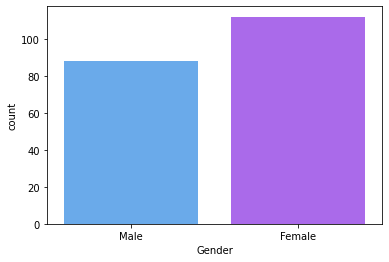

In [ ]:
sns.countplot(x = 'Gender', data = mall_customer, palette = 'cool')

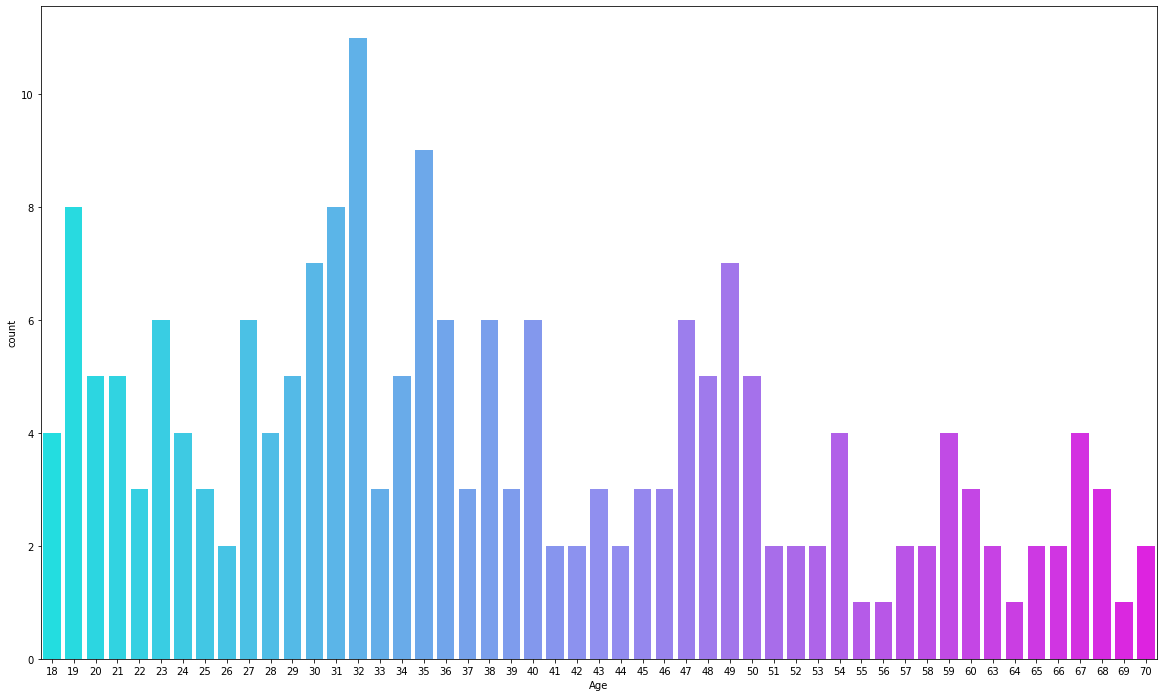

In [ ]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'Age', data = mall_customer, palette = 'cool')

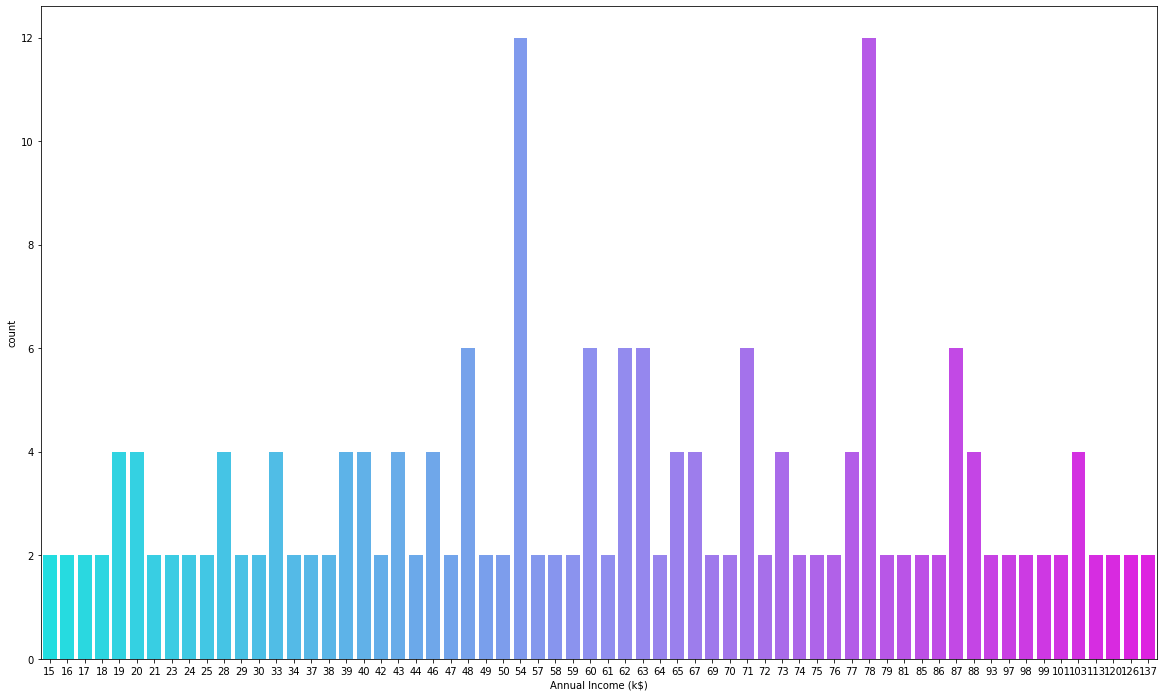

In [ ]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'Annual Income (k$)', data = mall_customer, palette = 'cool')

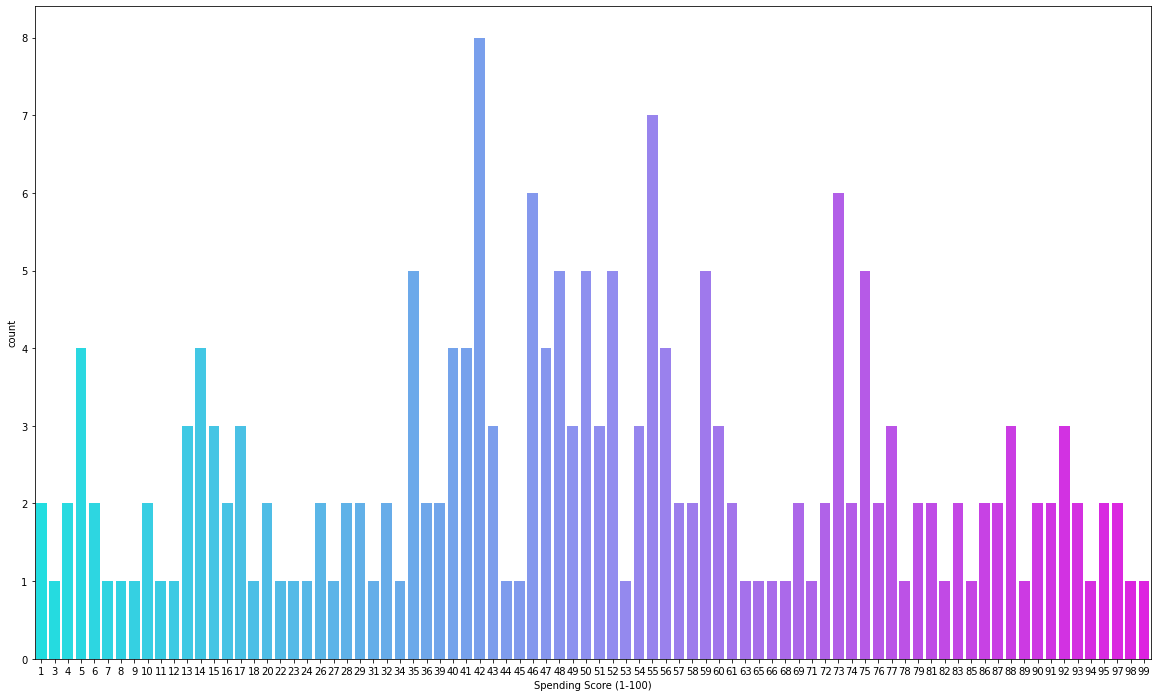

In [ ]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'Spending Score (1-100)', data = mall_customer, palette = 'cool')

**X - Features**

In [ ]:
x = mall_customer.iloc[:, [3,4]]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**Elbow Method**

In [ ]:
# Use Elbow method to find optimum number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

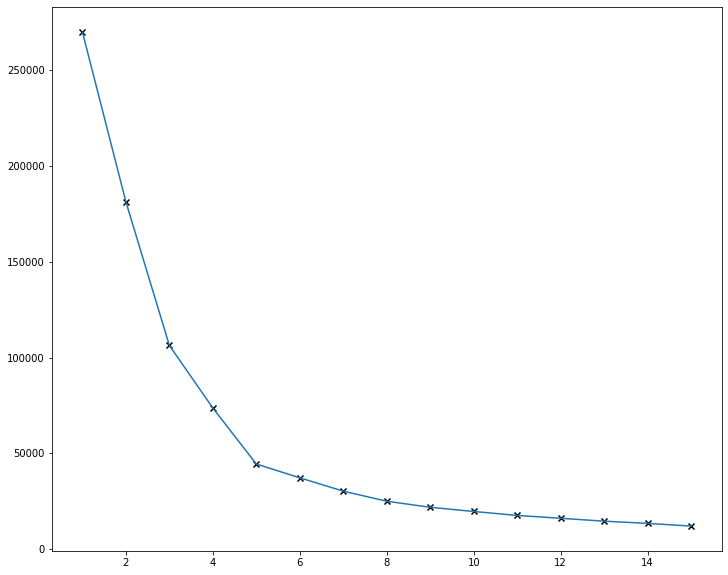

In [ ]:
#visualization of Elbow Method

plt.figure(figsize = (12,10))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, marker = 'x', c = 'black')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
y_clusters = kmeans.fit_predict(x)

In [ ]:
y_clusters

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
kmeans.inertia_

44448.45544793371